### Ejemplo de experimentación verificando la complejidad temporal

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure()
df = pd.read_csv("runtime.csv")

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Tiempo de ejecucion')

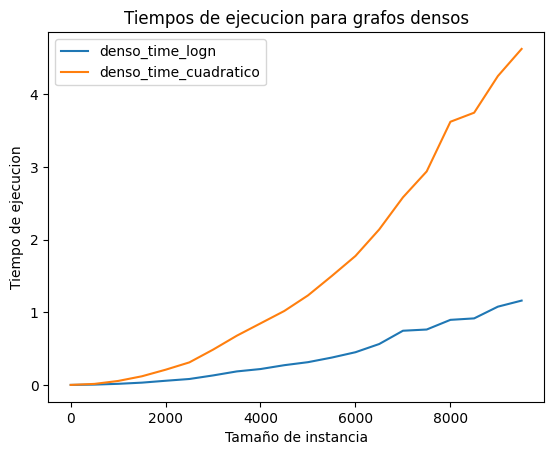

In [65]:
df[["n", "denso_time_logn", "denso_time_cuadratico"]].plot(x="n")
plt.title("Tiempos de ejecucion para grafos densos")
plt.xlabel("Tamaño de instancia")
plt.ylabel("Tiempo de ejecucion")

Text(0, 0.5, 'Tiempo de ejecucion')

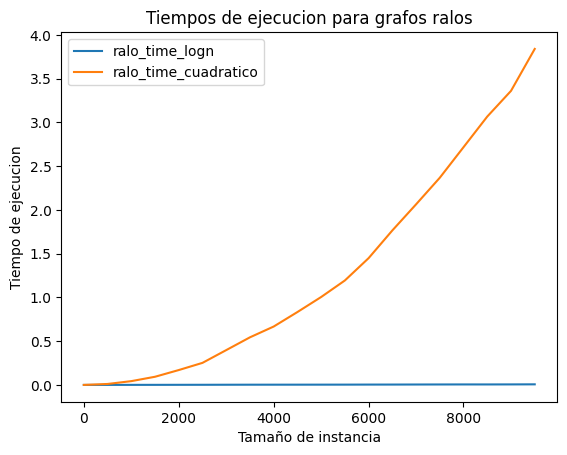

In [66]:
df[["n", "ralo_time_logn", "ralo_time_cuadratico"]].plot(x="n")
plt.title("Tiempos de ejecucion para grafos ralos")
plt.xlabel("Tamaño de instancia")
plt.ylabel("Tiempo de ejecucion")

Text(0, 0.5, 'Tiempo de ejecucion')

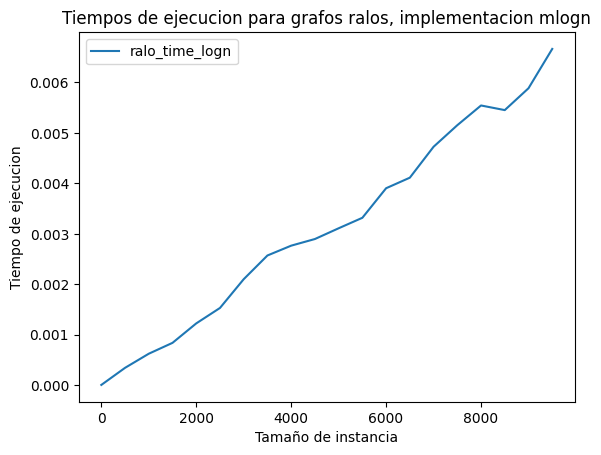

In [67]:
df[["n", "ralo_time_logn"]].plot(x="n")
plt.title("Tiempos de ejecucion para grafos ralos, implementacion mlogn")
plt.xlabel("Tamaño de instancia")
plt.ylabel("Tiempo de ejecucion")

### Ajusto las complejidades por la complejidad teórica

######  0. Implementación N cuadrado

Text(0, 0.5, 'Tiempo [s]')

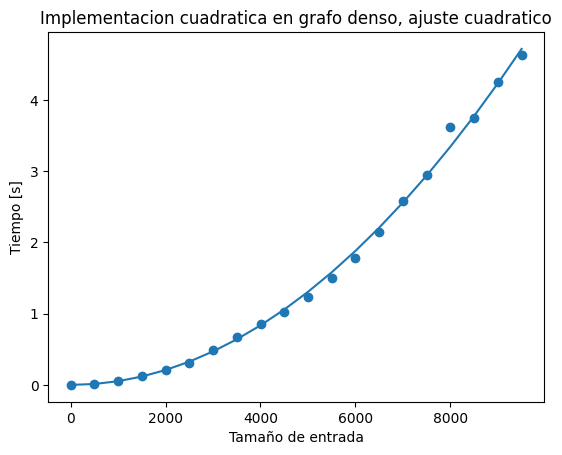

In [68]:
def n_cuadrado(x, a):
    return a * (x**2)

popt, pcov = curve_fit(n_cuadrado, df["n"], df["denso_time_cuadratico"])
[a] = popt

plt.scatter(df["n"], df["denso_time_cuadratico"])
plt.plot(df["n"], n_cuadrado(df["n"], a))
plt.title("Implementacion cuadratica en grafo denso, ajuste cuadratico")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

######  1. Implementación N cuadrado

Text(0, 0.5, 'Tiempo [s]')

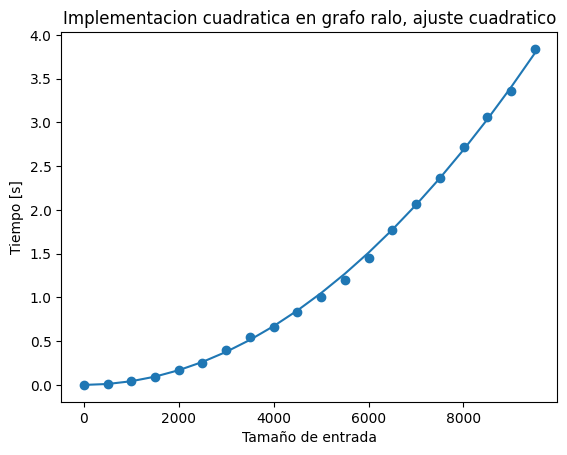

In [69]:
popt, pcov = curve_fit(n_cuadrado, df["n"], df["ralo_time_cuadratico"])
[a] = popt

plt.scatter(df["n"], df["ralo_time_cuadratico"])
plt.plot(df["n"], n_cuadrado(df["n"], a))
plt.title("Implementacion cuadratica en grafo ralo, ajuste cuadratico")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")

######  2. Implementación M*Log(N) para grafo denso

(1.4780201749755943e-09, 4.357698068506924e-22)

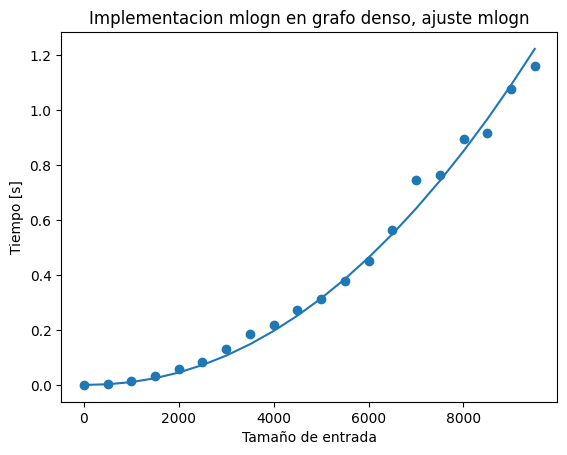

In [70]:
def mlogn_ajustado(x, a):
    return a*(x**2)*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["denso_time_logn"])
[a] = popt
[[p]] = pcov

plt.scatter(df["n"], df["denso_time_logn"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a))
plt.title("Implementacion mlogn en grafo denso, ajuste mlogn")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")
a, p

######  3. Implementación M*Log(N) para grafo ralo

Text(0, 0.5, 'Tiempo [s]')

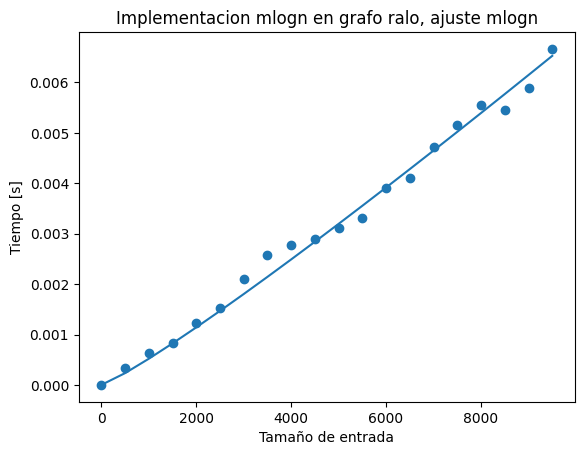

In [71]:
def mlogn_ajustado(x, a):
    return a*x*np.log(x)

popt, pcov = curve_fit(mlogn_ajustado, df["n"], df["ralo_time_logn"])
[a] = popt

plt.scatter(df["n"], df["ralo_time_logn"])
plt.plot(df["n"], mlogn_ajustado(df["n"], a))
plt.title("Implementacion mlogn en grafo ralo, ajuste mlogn")
plt.xlabel("Tamaño de entrada")
plt.ylabel("Tiempo [s]")